****The Effect of Unemployment and Wealth Disbribution on the United States Economy****

By Sujay Polineni & Rohit Tiwari

**Introduction**

In this final tutorial, we will be taking a specific topic through the data science lifecycle. The data science lifecycle consists of the following parts:


1.   Data Collection
2.   Data Processing
3.   Exploratory Analysis & Data Visualization
4.   Model: Analysis, Hypothesis Testing, & ML
5.   Interpretation: Insight & Policy Decision

The topic we are investigating has to do with the distribution of wealth among the United States population and how that impacts the economy. This is an extremely important topic, as it can be used by politicians and government officials to influence legislative decisions that will benefit the economy as well as the citizens. In this project, we will be examining the distribution of wealth by looking at data relating to unemployment, wealth across different populations, income brackets, and other similar variables. We will then examine the health of the economy at different times by using parameters such as GDP, employment rates, inflation, and consumer price and confidence indexes. After going through the data science lifecycle, we will be able to identify the correlation between the wealth the citizens have and the success of the economy, as well as how strong that correlation is. More information regarding the details and importance of the topic can be found here if interested:

https://www.pewresearch.org/social-trends/2020/01/09/trends-in-income-and-wealth-inequality/

https://www.epi.org/publication/secular-stagnation/

https://www.oecd.org/els/soc/trends-in-income-inequality-and-its-impact-on-economic-growth-SEM-WP163.pdf

**Part I: Data Collection**

This is the first part of the data science lifecycle. In this portion of the tutorial we will be gathering all the necessary data for the project and storing it in a series of descriptively named dataframes. We will be obtaining national economic data as well as income and wealth data for citizens over similar periods of time.

**Imports**

In [957]:
import pandas as pd
import numpy as np
import requests
import bs4
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

**Data**

In [958]:
# Unemployment Data
unemployment = requests.get("https://www.thebalance.com/unemployment-rate-by-year-3305506")
unemployment_text = bs4.BeautifulSoup(unemployment.content, 'html.parser')
unemployment_table = unemployment_text.find("table", {"class": "mntl-sc-block-table__table"})
unemployment_temp = pd.read_html(str(unemployment_table))
unemployment_temp = unemployment_temp[0]
unemployment_temp = unemployment_temp.drop(unemployment_temp.index[0:41])
unemployment_temp.head(5)

,Year,Unemployment Rate (December),Annual GDP Growth,"Inflation (December, YOY)",Notable Events
41,1970,6.1%,0.2%,5.6%,Recession
42,1971,6.0%,3.3%,3.3%,Emergency Employment Act; Wage-price controls
43,1972,5.2%,5.3%,3.4%,Ongoing Stagflation; Watergate break-in
44,1973,4.9%,5.6%,8.7%,CETA ; Gold standard ; Vietnam War ended
45,1974,7.2%,-0.5%,12.3%,Nixon resigns; Min. wage $2.00


In [959]:
unemployment_temp.shape[0]

51

In [960]:
unemployment_data = unemployment_temp
# unemployment_data.set_index('Year', inplace=True)
unemployment_data.head(5)

,Year,Unemployment Rate (December),Annual GDP Growth,"Inflation (December, YOY)",Notable Events
41,1970,6.1%,0.2%,5.6%,Recession
42,1971,6.0%,3.3%,3.3%,Emergency Employment Act; Wage-price controls
43,1972,5.2%,5.3%,3.4%,Ongoing Stagflation; Watergate break-in
44,1973,4.9%,5.6%,8.7%,CETA ; Gold standard ; Vietnam War ended
45,1974,7.2%,-0.5%,12.3%,Nixon resigns; Min. wage $2.00


In [961]:
# Consumer Price Index Data
cpi = requests.get("https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/")
cpi_text = bs4.BeautifulSoup(cpi.content, 'html.parser')
cpi_table = cpi_text.findAll("table", width="95%")
cpi_temp = pd.read_html(str(cpi_table))
cpi_temp = cpi_temp[0]
cpi_temp.head(8)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Annual,Percent Change,Percent Change
1,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Avg,Dec-Dec,Avg-Avg
2,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,9.9,–,–
3,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,10.0,1.0,1.0
4,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,10.1,2.0,1.0
5,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,10.9,12.6,7.9
6,1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7,12.8,18.1,17.4
7,1918,14.0,14.1,14.0,14.2,14.5,14.7,15.1,15.4,15.7,16.0,16.3,16.5,15.1,20.4,18.0


In [962]:
cpi_temp.shape[0]

111

In [963]:
# Cleaning CPI data headers and columns
cpi_data = cpi_temp.drop(index=0, axis=0)
cpi_data.columns = cpi_data.iloc[0]
cpi_data.drop(index=1, axis=0, inplace=True)
cpi_data.reset_index(inplace=True)
cpi_data.rename({'Avg': 'Annual Avg', 'Dec-Dec': 'Percent Change, Dec-Dec', 'Avg-Avg': 'Annual Percent Change in Avg'}, axis=1, inplace=True)
cpi_data.drop(columns='index', axis=1, inplace=True)

cpi_data = cpi_data.drop(cpi_data.index[0:57])
cpi_data = cpi_data.drop(cpi_data.index[-1])
cpi_data.reset_index(inplace=True)
cpi_data.drop(columns='index', axis=1, inplace=True)
cpi_data.head(5)

1,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Annual Avg,"Percent Change, Dec-Dec",Annual Percent Change in Avg
0,1970,37.8,38.0,38.2,38.5,38.6,38.8,39.0,39.0,39.2,39.4,39.6,39.8,38.8,5.6,5.7
1,1971,39.8,39.9,40.0,40.1,40.3,40.6,40.7,40.8,40.8,40.9,40.9,41.1,40.5,3.3,4.4
2,1972,41.1,41.3,41.4,41.5,41.6,41.7,41.9,42.0,42.1,42.3,42.4,42.5,41.8,3.4,3.2
3,1973,42.6,42.9,43.3,43.6,43.9,44.2,44.3,45.1,45.2,45.6,45.9,46.2,44.4,8.7,6.2
4,1974,46.6,47.2,47.8,48.0,48.6,49.0,49.4,50.0,50.6,51.1,51.5,51.9,49.3,12.3,11.0


In [964]:
# Income Data
income = requests.get("https://dqydj.com/household-income-by-year/")
income_text = bs4.BeautifulSoup(income.content, 'html.parser')
income_table = income_text.findAll("table", {"class": "has-fixed-layout"})
income_temp = pd.read_html(str(income_table))
income_temp = income_temp[0]
income_temp.head(8)

,0,1,2
0,Year,Median Household Income,Inflation Adjusted (2021)
1,1968,"$7,005.00","$54,393.83"
2,1969,"$7,683.00","$57,089.47"
3,1970,"$8,330.00","$58,802.23"
4,1971,"$8,700.00","$57,987.55"
5,1972,"$9,000.00","$57,518.52"
6,1973,"$9,648.00","$59,694.60"
7,1974,"$10,378.00","$60,363.42"


In [965]:
income_data = income_temp
income_data.columns = income_data.iloc[0]
income_data.drop(index=0, axis=0, inplace=True)
income_data.reset_index(inplace=True)
income_data.drop(columns='index', axis=1, inplace=True)

# income_data.set_index('Year', inplace=True)
income_data.head(5)

,Year,Median Household Income,Inflation Adjusted (2021)
0,1968,"$7,005.00","$54,393.83"
1,1969,"$7,683.00","$57,089.47"
2,1970,"$8,330.00","$58,802.23"
3,1971,"$8,700.00","$57,987.55"
4,1972,"$9,000.00","$57,518.52"


In [966]:
income_data.shape[0]

54

In [967]:
# Income Brackets
brackets = requests.get("https://www.ntu.org/foundation/tax-page/how-have-the-top-and-bottom-income-tax-brackets-changed-over-time")
brackets_text = bs4.BeautifulSoup(brackets.content, 'html.parser')
brackets_table = brackets_text.findAll("table", align="center")
brackets_temp = pd.read_html(str(brackets_table))
brackets_temp = brackets_temp[0]
brackets_temp.head(8)

,0,1,2,3,4,5
0,Historical Income Tax Rates & Brackets,Historical Income Tax Rates & Brackets,Historical Income Tax Rates & Brackets,Historical Income Tax Rates & Brackets,Historical Income Tax Rates & Brackets,NaN
1,NaN,Tax Rates 1,Tax Rates 1,Tax Rates 1,Tax Rates 1,NaN
2,NaN,Bottom bracket,Bottom bracket,Top bracket,Top bracket,NaN
3,Calendar Year,Rate(percent),Taxable Income Up to,Rate(percent),Taxable Incomeover,NaN
4,Calendar Year,Rate(percent),Taxable Income Up to,Rate(percent),Taxable Incomeover,NaN
5,2021,10 2,"$19,900",37,"$628,300",NaN
6,2020,10 2,"$19,750",37,"$622,050",NaN
7,2019,10 2,"$19,400",37,"$612,350",NaN


In [968]:
brackets_temp.shape[0]

79

In [969]:
# Data Cleaning needed to make this a usable data set
brackets_data = brackets_temp.drop(columns=5, axis=1)
index = pd.MultiIndex.from_product([['Bottom Bracket', 'Top Bracket'], ['Rate(percent)', 'Taxable Income Up To']])
brackets_data.columns = brackets_data.iloc[4]
brackets_data.drop(index=[0, 1, 2, 3, 4], axis=0, inplace=True)

brackets_data['Calendar Year'] = brackets_data['Calendar Year'].apply(lambda x: int(x[0:4]))
brackets_data.set_index('Calendar Year', inplace=True)
brackets_data.index.rename('Year', inplace=True)


brackets_data.columns = index

brackets_data.head(5)

Bottom Bracket                        Top Bracket                     
      Rate(percent) Taxable Income Up To Rate(percent) Taxable Income Up To
Year                                                                       
2021           10 2              $19,900            37             $628,300
2020           10 2              $19,750            37             $622,050
2019           10 2              $19,400            37             $612,350
2018           10 2              $19,050            37             $600,000
2017           10 2              $18,650          39.6             $470,700

In [970]:
# Fill in rows that were omitted in the dataset
for i in range(1973, 1979):
  to_append = { "Bottom Bracket": {"Rate(percent)":'14 2', "Taxable Income Up To":'$1,000'},"Top Bracket":{"Rate(percent)":'70', "Taxable Income Up To":'$200,000'}}
  brackets_data = brackets_data.append(pd.DataFrame.from_dict(to_append).unstack().rename(i))

to_append = { "Bottom Bracket": {"Rate(percent)":'14 2', "Taxable Income Up To":'$2,100'},"Top Bracket":{"Rate(percent)":'70', "Taxable Income Up To":'$212,000'}}
brackets_data = brackets_data.append(pd.DataFrame.from_dict(to_append).unstack().rename(1980))
brackets_data.sort_index(axis=0, ascending=False, inplace=True)

In [971]:
years_to_parse = [*list(range(2013, 2018)), *list(range(1993, 2003)), 1987]
years_to_parse = (*[str(i) for i in years_to_parse],)
years_to_parse

('2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '1987')

In [972]:
# Now we have to do very specific data parsing for specific columns

for i, row in brackets_data.iterrows():
  if i == '1981':
    row['Bottom Bracket', 'Rate(percent)', i] = row['Bottom Bracket', 'Rate(percent)'][0:7]
    row['Top Bracket', 'Rate(percent)', i] = row['Top Bracket', 'Rate(percent)'][0:7]
  else:
    if i == '1970':
      row['Top Bracket', 'Rate(percent)', i] = row['Top Bracket', 'Rate(percent)'][0:6]
    elif i in years_to_parse:
      row['Top Bracket', 'Rate(percent)', i] = row['Top Bracket', 'Rate(percent)'][0:5]
      print(row['Top Bracket', 'Rate(percent)', i])
    else:
      row['Top Bracket', 'Rate(percent)', i] = row['Top Bracket', 'Rate(percent)'][0:3]

    row['Bottom Bracket', 'Rate(percent)', i] = row['Bottom Bracket', 'Rate(percent)'][0:3]

brackets_data = brackets_data.iloc[::-1]
brackets_data.reset_index(inplace=True)
brackets_data = brackets_data.drop(brackets_data.index[-1])
brackets_data = brackets_data.drop(brackets_data.index[0:29])
brackets_data.reset_index(inplace=True)
brackets_data.head(5)

index  Year  ...   Top Bracket                     
               ... Rate(percent) Taxable Income Up To
0    29  1970  ...           71.             $200,000
1    30  1971  ...           70              $200,000
2    31  1972  ...           70              $200,000
3    32  1973  ...            70             $200,000
4    33  1974  ...            70             $200,000

[5 rows x 6 columns]

**Part II: Data Processing**

This is the second step of the data science lifecycle. We have obtained all the data sets we need to move on with the tutorial. Now, we must organize and restructure the data so that it can be used effectively. We will do this by creating a new dataframe, and splicing the necessary columns from the data we've collected into this master dataframe. Once we do so, we'll go through and adjust any missing values. Having one dataframe with all our information will keep our project organized and make it easy for us to work with. 

In [973]:
# Convert string values to numeric values to they can be used in visualizations and regressions
def string_to_numeric(df, col_name):
  for name in col_name:
    df[name] = pd.to_numeric(df[name].str.replace('[^-.0-9]', ''))

In [974]:
# Creation of Master DataFrame
data = pd.DataFrame({
    "Year": unemployment_data["Year"],
    "Unemployment Rate": unemployment_data['Unemployment Rate (December)'],
    "GDP Growth": unemployment_data['Annual GDP Growth'],
    "Inflation": unemployment_data['Inflation (December, YOY)'],
    
})
data.reset_index(inplace=True)
data = data.drop('index', 1)
data["Average CPI"] = cpi_data['Annual Avg']
data["CPI Percent Change"] = cpi_data['Annual Percent Change in Avg']
data["Median Income"] = income_data['Median Household Income']
data["Inflation Adjusted Income"] = income_data['Inflation Adjusted (2021)']
data['Bottom Bracket Tax Rate %'] = brackets_data['Bottom Bracket', 'Rate(percent)']
data['Bottom Bracket Taxable Income Up To'] = brackets_data['Bottom Bracket', 'Taxable Income Up To']
data['Top Bracket Tax Rate %'] = brackets_data['Top Bracket', 'Rate(percent)']
data['Top Bracket Taxable Income Over'] = brackets_data['Bottom Bracket', 'Taxable Income Up To']
string_to_numeric(data, data.columns[1:])
data

,Year,Unemployment Rate,GDP Growth,Inflation,Average CPI,CPI Percent Change,Median Income,Inflation Adjusted Income,Bottom Bracket Tax Rate %,Bottom Bracket Taxable Income Up To,Top Bracket Tax Rate %,Top Bracket Taxable Income Over
0,1970,6.1,0.2,5.6,38.800,5.7,7005.0,54393.83,14.0,1000,71.0,1000
1,1971,6.0,3.3,3.3,40.500,4.4,7683.0,57089.47,14.0,1000,70.0,1000
2,1972,5.2,5.3,3.4,41.800,3.2,8330.0,58802.23,14.0,1000,70.0,1000
3,1973,4.9,5.6,8.7,44.400,6.2,8700.0,57987.55,14.0,1000,70.0,1000
4,1974,7.2,-0.5,12.3,49.300,11.0,9000.0,57518.52,14.0,1000,70.0,1000
5,1975,8.2,-0.2,6.9,53.800,9.1,9648.0,59694.60,14.0,1000,70.0,1000
6,1976,7.8,5.4,4.9,56.900,5.8,10378.0,60363.42,14.0,1000,70.0,1000
7,1977,6.4,4.6,6.7,60.600,6.5,11000.0,57712.84,14.0,1000,70.0,1000
8,1978,6.0,5.5,9.0,65.200,7.6,11700.0,56254.18,14.0,1000,70.0,1000
9,1979,6.0,3.2,13.3,72.600,11.3,12604.0,57233.95,14.0,2100,70.0,2100


Now, we have our completed master data frame. We spliced in the columns necessary from the data we gathered that we will be using in the remainder of the tutorial and left out all the irrelevant information. Luckily, we didn’t have to deal with any missing data. All of our sources had clean and well documented information so we are lucky our data frame fits together so well. One thing we did need to do however to make our data usable was perform type conversions. Much of our data was saved as strings, more specifically the values that were money or percentages. In order to fix this issue we wrote a small function that would perform a conversion by deleting anything that was not a numerical value. After applying this function to our data frame, we now have a fully usable set of information that will be much easier to utilize.

**Part III: Exploratory Analysis & Data Visualization**

Now we enter the third part of the data science life cycle which requires us to visualize our data. We'll plot a variety of parameters through different types of plots to help us see if there exists and interesting and non obvious correlations in the data.

To get started, let's plot unemployment against the GDP growth:

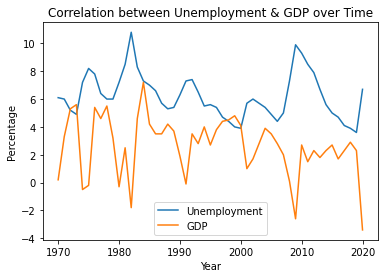

In [975]:
plt.plot(data['Year'], data['Unemployment Rate'], label='Unemployment')
plt.plot(data['Year'], data['GDP Growth'], label='GDP')
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Correlation between Unemployment & GDP over Time")
plt.legend()
plt.show()

In this plot, we can see that an inverse relationshp exists between unemployment and GDP. Increases in unemployment result in almost immediate decreases in GDP. This is a logical conclusion as it is to be expected that more unemployed people would contribute to a lower GDP. This plot proves that point for data collected over the last 50 years in the United States. 

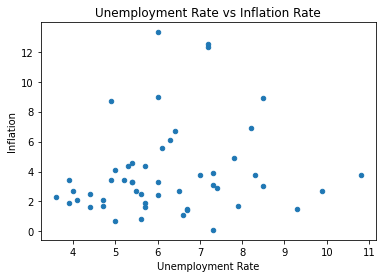

In [976]:
data.plot(kind="scatter", x='Unemployment Rate', y='Inflation', title="Unemployment Rate vs Inflation Rate")

Just like with the previous graph, we can see a trend between unemployment and inflation. Lower unemployment rates tend to result in smaller increases of inflation.

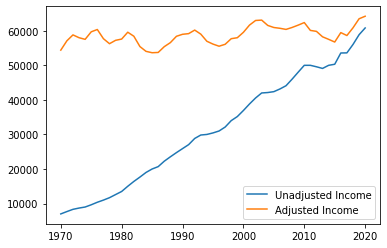

In [977]:
plt.plot(data['Year'], data['Median Income'], label='Unadjusted Income')
plt.plot(data['Year'], data['Inflation Adjusted Income'], label='Adjusted Income')
plt.legend()
plt.show()

Here we see that inflation has increased signifcantly in the last 50 years.

In [978]:
temp = cpi_data
temp.drop('Annual Avg', axis=1, inplace=True)
temp.drop('Percent Change, Dec-Dec', axis=1, inplace=True)
temp.drop('Annual Percent Change in Avg', axis=1, inplace=True)
temp = pd.melt(temp, ["Year"], var_name='Month', value_name='CPI')
temp["CPI"] = temp["CPI"].astype(float)
temp.head(15)

,Year,Month,CPI
0,1970,Jan,37.8
1,1971,Jan,39.8
2,1972,Jan,41.1
3,1973,Jan,42.6
4,1974,Jan,46.6
5,1975,Jan,52.1
6,1976,Jan,55.6
7,1977,Jan,58.5
8,1978,Jan,62.5
9,1979,Jan,68.3


In order to do a violion plot of the data, we needed to melt some of the data as seen above.

Text(0.5, 1.0, 'CPI by Month')

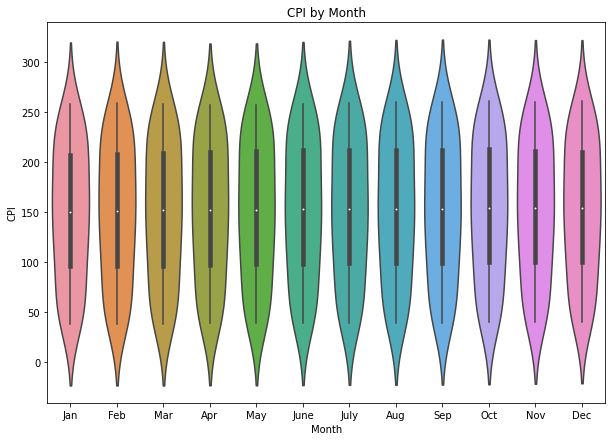

In [979]:
violin = sns.violinplot(x=temp['Month'], y=temp['CPI'])
violin.figure.set_size_inches(10,7)
plt.title('CPI by Month')

The purpose of this plot was to see if there was a seasonal correlation between CPI index and year. CPI index (aka customer price index)  is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods. This plot combines the CPI's of each year across all 12 months. From the plot, we can conclude that there is no seasonal impact on the cpi. For instance, one could assume CPI increases over winter due to seasonal events. This plot however rules that out and shows it tends to stay consistent for the year. More information regarding CPI indexes can be found here: https://www.bls.gov/cpi/ 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

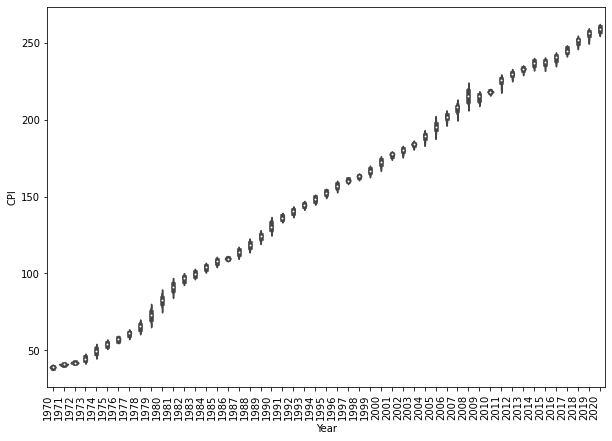

In [980]:
violin = sns.violinplot(x=temp['Year'], y=temp['CPI'])
violin.figure.set_size_inches(10,7)
plt.xticks(rotation=90, ha='right')

Now we did a violin plot by year and CPI index. We see an obvious correlation of CPI index increasing over time. 

**Part IV: Model**

Our target / dependent variable will be Unemployment Rate, as we feel that it is the most relevant to the current Covid situation and our near future. We chose the independent variables GDP Growth, Inflation, CPI Percent Change, Inflation Adjusted Income, Bottom Bracket Tax Rate, and Top Bracket Tax Rate because all of these factors besides GDP Growth directly affect American employees.

The following is our rationale for choosing our specific models:
* Lasso and Ridge regressions use shrinkage, which standardize independent variables and minimize the effect loosely correlated features have in the model prediction process. Furthermore, they are good regressions for situations where many variables have high correlations, which we have in our small dataset.
* We opted to use a Linear Regression as a base estimator
* We trained a Support Vector Regression because wanted to see the risk that overfitting posed to our other models, as Support Vector Regression is prone to such behavior when the number of dimensions of the data and the dataset size are closer.

In [981]:
# We'll use Lasso, Ridge, Linear, and Support Vector Regressions
from sklearn import (svm, datasets)
from sklearn.linear_model import (Lasso, Ridge, LinearRegression)
from sklearn.model_selection import (cross_val_score, RandomizedSearchCV, train_test_split)
from sklearn.preprocessing import MinMaxScaler

# First we define our independent variables
X = ['GDP Growth', 'Inflation', 'CPI Percent Change', 'Inflation Adjusted Income', \
     'Bottom Bracket Tax Rate %', 'Top Bracket Tax Rate %']
y = ['Unemployment Rate']

# We have to scale our independent variables because values like Inflation Adjusted Income 
# would otherwise have far too large a bearing in our model training process
X_std = MinMaxScaler().fit_transform(data[X])

X_train, X_test, y_train, y_test = train_test_split(X_std, data[y], test_size=0.10, shuffle=True)

Now we'll train our four regression models:

In [982]:
base_lasso = Lasso(fit_intercept=True, tol=0.000001)
params = [{"alpha": np.logspace(-4, -0.5, 30)}]
lasso = RandomizedSearchCV(base_lasso, params, cv=10).fit(X_train, y_train)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)
print(lasso_scores)

[-2.0361793  -0.33025202 -0.0109319  -0.46431135 -0.56469139 -0.02092408
 -0.01488744 -0.38862888 -0.67959958 -0.61391789]


In [983]:
base_ridge = Ridge(fit_intercept=True)
ridge = RandomizedSearchCV(base_ridge, params, cv=10).fit(X_train, y_train)
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)
print(ridge_scores)

[-1.93624337 -0.78780791 -0.34352849 -2.09946581 -1.24358701  0.34419639
  0.36168083 -0.46159082  0.48749572 -0.4423042 ]


In [ ]:
base_linear = LinearRegression(fit_intercept=True)
linear = RandomizedSearchCV(base_linear, {'fit_intercept': [True, False]}, cv=10).fit(X_train, y_train)
linear_scores = cross_val_score(linear, X_train, y_train, cv=10)

In [985]:
print(linear_scores)

[-2.32840063 -0.9657071  -0.79214668 -2.49386435 -1.17113798  0.43067716
  0.43172377 -0.46374466  0.56155982 -0.72289787]


In [ ]:
from sklearn.utils.fixes import loguniform
params_svr = {
             'gamma': loguniform(1e-4, 1e-3),
             'kernel': ['rbf'],
             }
base_svr = svm.SVR()
svr =  RandomizedSearchCV(base_svr, params_svr, cv=10).fit(X_train, y_train)
svr_scores = cross_val_score(svr, X_train, y_train, cv=10)

In [987]:
print(svr_scores)

[-1.75410671e+00 -1.44941191e-01 -1.15876363e-01 -1.19308947e+00
 -1.04431897e+00 -3.25420252e-04 -3.46741007e-02 -4.06311074e-01
 -1.71755875e-01 -1.72270380e-01]


In [988]:
df_scores = pd.DataFrame({'lasso_scores': lasso_scores, 'svr_scores': svr_scores,\
                          'linear_scores': linear_scores, 'ridge_scores': ridge_scores})
df_scores.mean()

lasso_scores    -0.512432
svr_scores      -0.503767
linear_scores   -0.751394
ridge_scores    -0.612115
dtype: float64

From the above dataframe, we can see that using 10-fold cross_validation shows that a standard Linear Regression performs the best out of our Lasso, Ridge, and Support Vector Regressions. This is slightly surprising as we anticipated that the Ridge and Lasso regressions would account for the linear dependence between our independent variables more successfully than both the Linear and Support Vector Regressions. Furthermore, on a small dataset like ours, we anticipated shrinkage would reduce the effect of outliers within our data and thus make the performance of our Lasso and Ridge regressions more robust. 

In [989]:
df_predictions = pd.DataFrame({'actual': y_test['Unemployment Rate'], \
                               'lasso_pred': lasso.predict(X_test),\
                               'ridge_pred': list(np.concatenate(ridge.predict(X_test)).flat),\
                               'linear_pred': list(np.concatenate(linear.predict(X_test)).flat),\
                               'svr_pred': svr.predict(X_test)})
df_predictions

,actual,lasso_pred,ridge_pred,linear_pred,svr_pred
37,5.0,6.277672,6.078515,5.899355,6.099262
40,9.3,6.186229,5.699720,5.608787,6.099047
28,4.4,5.984437,5.424593,5.333075,6.099145
30,3.9,6.036690,5.488906,5.379810,6.099279
25,5.6,6.219575,6.199648,6.258936,6.099406
26,5.4,6.075880,5.903529,5.868508,6.099348


As we can see from our above data, it's tough to construct an accurate regression model based on less than a century of data. Especially when it comes to a statistic as complex as America's unemployment rate, there are many more factors that must be observed to draw reasonable conclusions.

**Part V: Interpretation**

We have now reached the fifth and final part of our data science lifecycle: Interpretation for insight and policy decision. This is arguably the most important part of the data science lifecycle as it’s where we can apply the value of our findings. It’s here that we analyze our data & regressions and give our feedback on it. In our dataset, we were working with a limited number of years and data types, so there is a certain degree of uncertainty to our findings. Nevertheless, we are still able to draw some effective conclusions. We found that unemployment is the single most effective dependent variable. The unemployment rate has the largest impact on the GDP of the country as well as the consumer price index. We opted to pivot direction and also examine how other factors affect the unemployment rate. This information is very important for policy decisions. In the hands of a lawmaker, they can effectively see that fixing unemployment is one of the biggest if not the biggest factor when it comes to the country's overall economic success. Yes, wealth distribution, tax brackets, and customer indexes do have an effect and give some insight, but unemployment is the most influential factor. 